In [32]:
from pathlib import Path
import datetime as dt
import pandas as pd
import numpy as np

In [34]:
df_tx = pd.read_csv(Path("../../../data/processed_data/tx_cleaned_ev_stations_data.csv"))

# Filter the data for the specified counties
counties_to_keep = ['Harris County', 'Dallas County', 'Tarrant County', 'Bexar County', 'Travis County']
filtered_df = df_tx[df_tx['county'].isin(counties_to_keep)]

# Get the data for "Other Texas Counties"
other_counties_df = df_tx[~df_tx['county'].isin(counties_to_keep)]
other_counties_summed = other_counties_df.groupby('year').sum().reset_index()
other_counties_summed['county'] = 'Other Texas Counties'

# Concatenate the filtered data and "Other Texas Counties" data
final_df = pd.concat([filtered_df, other_counties_summed])

# Save the cleaned data to a new CSV file
final_df.to_csv('cleaned_ev_stations_data.csv', index=False)

final_df

,year,county,ev_station_count,cumulative_ev_stations
0,2010,Dallas County,1,1
1,2011,Bexar County,5,5
3,2011,Dallas County,3,4
6,2011,Harris County,8,8
7,2011,Tarrant County,4,4
...,...,...,...,...
9,2020,Other Texas Counties,93,286
10,2021,Other Texas Counties,146,459
11,2022,Other Texas Counties,295,781
12,2023,Other Texas Counties,324,1085


In [37]:
# Save the cleaned data to a new CSV file
final_df.to_csv('tx_cleaned_ev_stations_data_topfive.csv', index=False)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df_tx_topfive = pd.read_csv(Path("../../../data/processed_data/tx_cleaned_ev_stations_data_topfive.csv"))

df_tx_topfive

,year,county,ev_station_count,cumulative_ev_stations
0,2010,Dallas County,1,1
1,2011,Bexar County,5,5
2,2011,Dallas County,3,4
3,2011,Harris County,8,8
4,2011,Tarrant County,4,4
...,...,...,...,...
74,2020,Other Texas Counties,93,286
75,2021,Other Texas Counties,146,459
76,2022,Other Texas Counties,295,781
77,2023,Other Texas Counties,324,1085


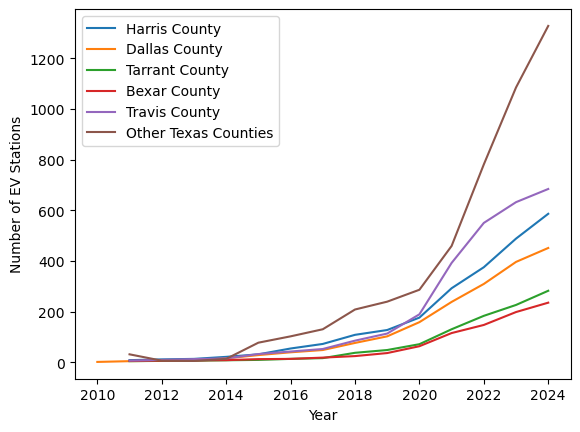

In [41]:
# Create a separate plot for each county
counties = ['Harris County', 'Dallas County', 'Tarrant County', 'Bexar County', 'Travis County','Other Texas Counties']

fig, ax = plt.subplots()
for county in counties:
    county_data = df_tx_topfive[df_tx_topfive['county'] == county]
    ax.plot(county_data['year'], county_data['cumulative_ev_stations'], label=county)

# Add labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of EV Stations')
ax.legend()

# Show the plot
plt.show()

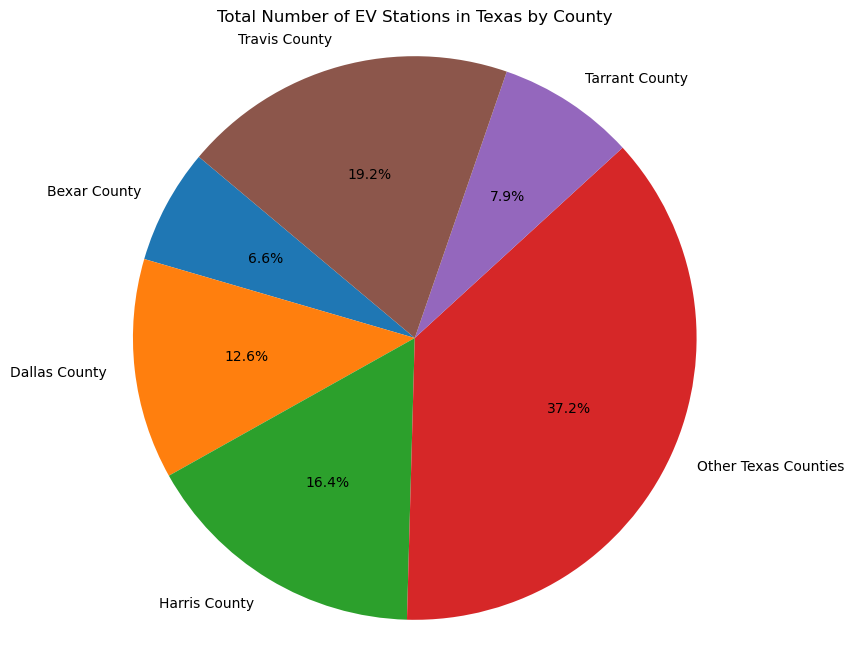

In [43]:
# Create a pie chart for the total number of EV stations by county
county_totals = df_tx_topfive.groupby('county')['cumulative_ev_stations'].max()

plt.figure(figsize=(8, 8))
plt.pie(county_totals, labels=county_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Number of EV Stations in Texas by County')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the pie chart
plt.show()

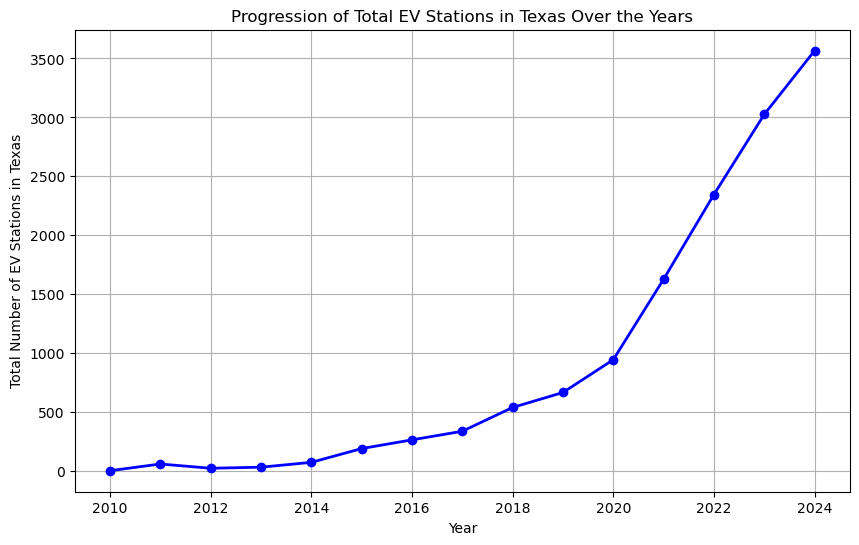

In [52]:
# Combine all county data to create a progression graph for Texas
total_ev_by_year = df_tx_topfive.groupby('year')['cumulative_ev_stations'].sum().reset_index()

# Plot the progression graph
plt.figure(figsize=(10, 6))
plt.plot(total_ev_by_year['year'], total_ev_by_year['cumulative_ev_stations'], marker='o', color='b', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Total Number of EV Stations in Texas')
plt.title('Progression of Total EV Stations in Texas Over the Years')
plt.grid(True)
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
X = total_ev_by_year[['year']]
y = total_ev_by_year['cumulative_ev_stations']

model = LinearRegression()
model.fit(X, y)

# Make a prediction for 2030
prediction_2030 = model.predict([[2030]])
print("Predicted number of EV stations in Texas by 2030:", prediction_2030[0])

Predicted number of EV stations in Texas by 2030: 3910.9142857142724


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted number of EV stations in Texas by 2030: 3910.9142857142724


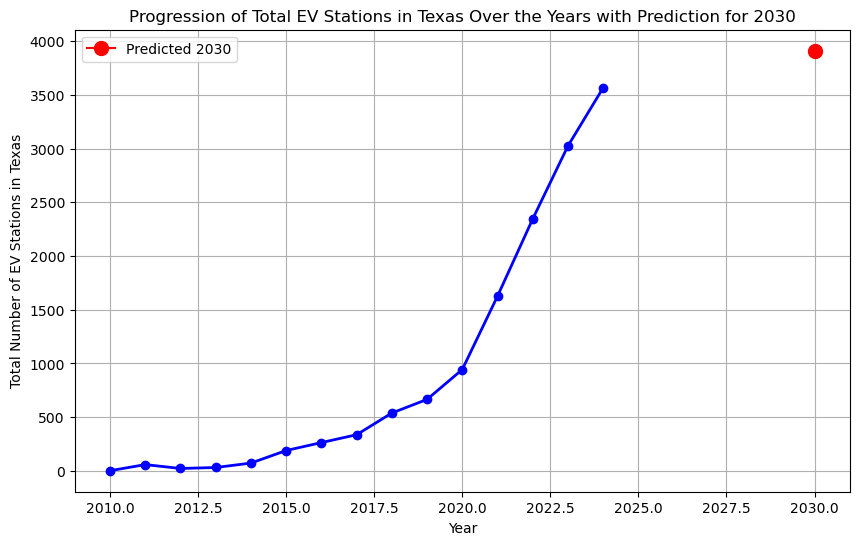

In [56]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model to the historical data
X = total_ev_by_year['year'].values.reshape(-1, 1)
y = total_ev_by_year['cumulative_ev_stations'].values

model = LinearRegression()
model.fit(X, y)

# Predict the number of EV stations in 2030
future_year = np.array([[2030]])
predicted_stations_2030 = model.predict(future_year)

print("Predicted number of EV stations in Texas by 2030:", predicted_stations_2030[0])

# Plot the progression graph with the prediction for 2030
plt.figure(figsize=(10, 6))
plt.plot(total_ev_by_year['year'], total_ev_by_year['cumulative_ev_stations'], marker='o', color='b', linestyle='-', linewidth=2)
plt.plot([2030], predicted_stations_2030, marker='o', color='r', markersize=10, label='Predicted 2030')
plt.xlabel('Year')
plt.ylabel('Total Number of EV Stations in Texas')
plt.title('Progression of Total EV Stations in Texas Over the Years with Prediction for 2030')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
import pandas as pd


# Load the data from the .csv files
df_tx_topfive = pd.read_csv(Path("../../../data/processed_data/tx_cleaned_ev_stations_data_topfive.csv"))
df_fl_topfive = pd.read_csv(Path("../../../data/processed_data/fl_cleaned_ev_stations_data_topfive.csv"))
df_ca_topfive = pd.read_csv(Path("../../../data/processed_data/ca_cleaned_ev_stations_topfive_data.csv"))

#Combine the data from all three dataframes into a single dataframe:
combined_data = pd.concat([df_ca_topfive, df_tx_topfive, df_fl_topfive])


#Import the Prophet library and create a Prophet model:

from fbprophet import Prophet

model = Prophet()


#Fit the model using the combined data:

model.fit(combined_data)


#Create a dataframe with the future dates for the next five years:

future_dates = model.make_future_dataframe(periods=5, freq='Y')


#Make predictions for the future dates:


forecast = model.predict(future_dates)


#Plot the forecasted data:

fig = model.plot(forecast)

ModuleNotFoundError: No module named 'fbprophet'